<a href="https://colab.research.google.com/github/anibaltafur/models-example/blob/main/github_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example of basic usage of Git in Python


In [1]:
# Installing Git for Python
%%capture
!pip install GitPython

In [2]:
# Importing packages
from git import Repo
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Cloning a repository with an specific tag (version)
# If no branch is specified, the main branch is imported (current version)
Repo.clone_from(url="https://github.com/anibaltafur/models-example", to_path="./models/",branch='v0.1')

<git.repo.base.Repo '/content/models/.git'>

In [4]:
# Checking version and project history
# Note that the head does not show "MAIN", indicating that this is not the current version/branch
%cd ./models
!git log

/content/models
commit d730139c456678e2b396592199e384c296c6c0f9 (HEAD, tag: v0.1)
Author: Anibal Tafur <atafurg@gmail.com>
Date:   Mon Aug 1 21:10:17 2022 -0500

    Add files via upload

commit 10bc65db0efa426a320ef8afb333b1642e9dc26f
Author: Anibal Tafur <atafurg@gmail.com>
Date:   Mon Aug 1 21:06:23 2022 -0500

    Initial commit


In [5]:
from models import berth_storm_fragility as frag

In [6]:
# Checking docstrings of module
help(frag)

Help on module models.berth_storm_fragility in models:

NAME
    models.berth_storm_fragility

DESCRIPTION
    # Fragility models for berth structures subjected to storms
    # Author: Anibal Tafur (coding only, not model development)
    # Last update: 2022-07-18

FUNCTIONS
    pile_connection_pf_balomenos(IM, params)
        Description:
        Fragility models for pile connections in wharves and piers.
        Only uplift failure mode.
        
        Input:
        IM: dict
        IM['Hmax']: maximum wave height (m), range = [0,8m]
        IM['Zc']: relative surge elevation (clearance) (m), range = [-2,2m]
        
        params: dict
        params['moment']: moment connection type, 'full' or 'partial'
        params['comp_zone']: compression zone, 'in' or 'out'
        
        Output:
        pf = connection probability of failure
        
        Source:
        Balomenos, G. P., & Padgett, J. E. (2018). 
        Fragility Analysis of Pile-Supported Wharves and Piers Expose

In [7]:
# Checking docstrings of function
help(frag.pile_connection_pf_balomenos)

Help on function pile_connection_pf_balomenos in module models.berth_storm_fragility:

pile_connection_pf_balomenos(IM, params)
    Description:
    Fragility models for pile connections in wharves and piers.
    Only uplift failure mode.
    
    Input:
    IM: dict
    IM['Hmax']: maximum wave height (m), range = [0,8m]
    IM['Zc']: relative surge elevation (clearance) (m), range = [-2,2m]
    
    params: dict
    params['moment']: moment connection type, 'full' or 'partial'
    params['comp_zone']: compression zone, 'in' or 'out'
    
    Output:
    pf = connection probability of failure
    
    Source:
    Balomenos, G. P., & Padgett, J. E. (2018). 
    Fragility Analysis of Pile-Supported Wharves and Piers Exposed to 
    Storm Surge and Waves.
    Journal of Waterway, Port, Coastal, and Ocean Engineering, 144(2), 04017046. 
    https://doi.org/10.1061/(ASCE)WW.1943-5460.0000436



In [8]:
# Testing function
IM={}
IM['Hmax'] = 4
IM['Zc'] = -2

params={}
params['moment'] = 'full'
params['comp_zone'] = 'in'

frag.pile_connection_pf_balomenos(IM,params)

0.10909682119561294

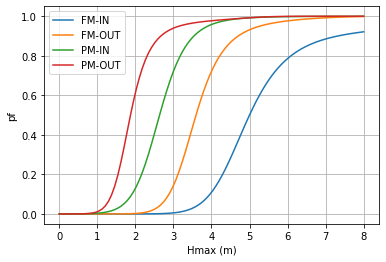

In [9]:
# Testing functions
xdata = np.linspace(0.001,8,100)

y1, y2, y3, y4 = ([] for i in range(4))

for x in xdata:
    y1.append(frag.pile_connection_pf_balomenos(IM=dict([('Hmax',x),('Zc',-2)]),
                                      params=dict([('moment','full'),('comp_zone','in')])))
    y2.append(frag.pile_connection_pf_balomenos(IM=dict([('Hmax',x),('Zc',-2)]),
                                      params=dict([('moment','full'),('comp_zone','out')])))
    y3.append(frag.pile_connection_pf_balomenos(IM=dict([('Hmax',x),('Zc',-2)]),
                                      params=dict([('moment','partial'),('comp_zone','in')])))
    y4.append(frag.pile_connection_pf_balomenos(IM=dict([('Hmax',x),('Zc',-2)]),
                                      params=dict([('moment','partial'),('comp_zone','out')])))

plt.plot(xdata, y1, label='FM-IN')
plt.plot(xdata, y2, label='FM-OUT')
plt.plot(xdata, y3, label='PM-IN')
plt.plot(xdata, y4, label='PM-OUT')
plt.xlabel("Hmax (m)")
plt.ylabel("pf")
plt.legend()
plt.grid()
plt.show()

More git commands that may be useful:

```git status```

```git checkout <commit_hash>```

```git checkout tags/<tag>```

```git checkout main```

Another way of using a GitHub repository is configuring it as an installable package using a ```setup.py``` file and using ```pip install <repo_link>```. More info at: https://docs.python.org/3/distutils/setupscript.html